In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt

from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY

from misc.config import c
data_dir = c["DATA_DIR"]

import kaggle_ninja

In [24]:
kaggle_ninja.turn_on_force_reload_all()

loader = ["get_splitted_uniform_data",
             {"n_folds": 1,
              "seed":666,
              "test_size":0.0}]
preprocess_fncs = []

tiles = get_data([['5ht7', 'ExtFP']], loader, preprocess_fncs).values()[0][0][0]

X = tiles['X_train']['data']
y = tiles['Y_train']['data']
print X.shape
print y.shape

y = ObstructedY(y)

warm_start, _ = random_query(X, y, None, batch_size=300, seed=666)
y.query(warm_start)

al_ecml2015: 2015-06-04 17:54:25,757 - Running preprocess on 0 fold
al_ecml2015: 2015-06-04 17:54:25,758 - Wasn't able to set write/read flags


(3000, 2)
(3000,)


array([ 1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,
        1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1

In [26]:
euc_dist = construct_normalized_euc(X)

In [ ]:
model = SVC(C=1, kernel='linear')
model.fit(X[warm_start], y[warm_start])

In [35]:
unc_pick, _ = uncertanity_sampling(X, y, model, batch_size=20, seed=666)
greedy_pick, greedy_score = quasi_greedy_batch(X, y, model, c=0.5, batch_size=20, seed=666, dist='exp_euc')

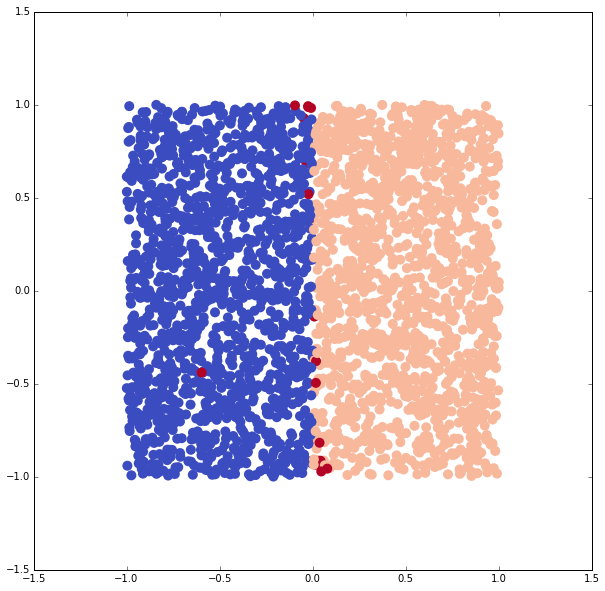

In [36]:
plt.figure(figsize=(10,10))
greedy_y = np.copy(y._y)
greedy_y[greedy_pick] = 2
plt.scatter(X[:,0], X[:,1], c=greedy_y, linewidths=0, cmap=plt.cm.coolwarm, s=100)

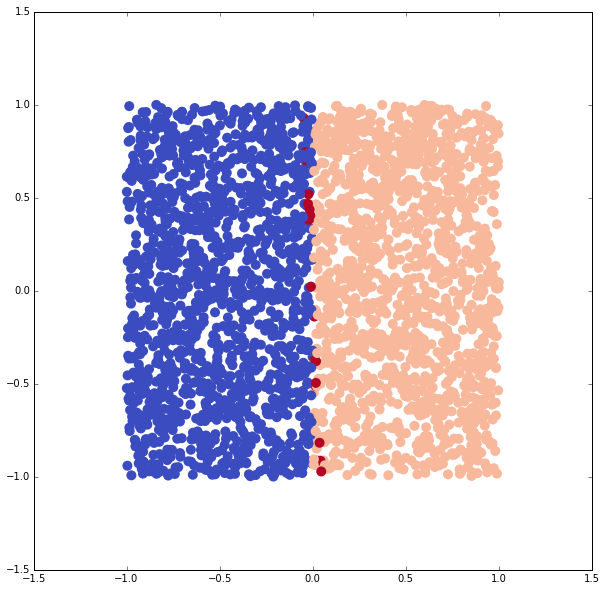

In [37]:
plt.figure(figsize=(10,10))
unc_y = np.copy(y._y)
unc_y[unc_pick] = 2
plt.scatter(X[:,0], X[:,1], c=unc_y, linewidths=0, cmap=plt.cm.coolwarm, s=100)

In [4]:
from experiments.experiment_runner import run_experiment, run_experiment_grid
import experiments
from experiments import experiment_runner, fit_active_learning, fit_grid
from experiments.utils import get_best
from models.strategy import cosine_distance_normalized

from kaggle_ninja import *

grid_result_passive = run_experiment("fit_grid",
                                    recalculate_experiments=False,
                                    n_jobs = 1,
                                    experiment_detailed_name="fit_svm_passive_tiles",
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                   "base_model_kwargs:kernel": ['linear']},
                                    base_experiment_kwargs={"strategy": "random_query",
                                                       "loader_function": "get_splitted_uniform_data",
                                                       "batch_size": 20,
                                                       "base_model": "SVC",
                                                       "loader_args": {"n_folds": 2}})

fit_grid: 2015-06-04 19:17:41,668 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-04 19:17:41,670 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-04 19:17:41,670 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-04 19:17:41,671 - Added new config entry: "base_experiment_kwargs.loader_args.n_folds"
fit_grid: 2015-06-04 19:17:41,671 - Added new config entry: "base_experiment_kwargs.loader_function"
fit_grid: 2015-06-04 19:17:41,671 - Added new config entry: "base_experiment_kwargs.strategy"
fit_grid: 2015-06-04 19:17:41,672 - Added new config entry: "grid_params.base_model_kwargs:C"
fit_grid: 2015-06-04 19:17:41,672 - Added new config entry: "grid_params.base_model_kwargs:kernel"
fit_grid: 2015-06-04 19:17:41,672 - Running command 'main'
fit_grid: 2015-06-04 19:17:41,672 - Started
fit_grid: 2015-06-04 19:17:41,717 - Read from cache fit_grid
fit_grid: 2015-06-04 19:17:41,717 - Completed after 0:

Loading  {'grid_params': {u'base_model_kwargs:kernel': ['linear'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 1, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_passive_tiles', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2}, u'base_model': 'SVC', u'loader_function': 'get_splitted_uniform_data', u'batch_size': 20, u'strategy': 'random_query'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}


In [5]:
grid_result_uncertainty = run_experiment("fit_grid",
                                    recalculate_experiments=False,
                                    n_jobs = 1,
                                    experiment_detailed_name="fit_svm_uncertainty_tiles",
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                   "base_model_kwargs:kernel": ['linear']},
                                    base_experiment_kwargs={"strategy": "uncertanity_sampling",
                                                       "loader_function": "get_splitted_uniform_data",
                                                       "batch_size": 20,
                                                       "base_model": "SVC",
                                                       "loader_args": {"n_folds": 2}})

fit_grid: 2015-06-04 19:17:44,621 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-04 19:17:44,621 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-04 19:17:44,622 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-04 19:17:44,622 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-04 19:17:44,623 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-04 19:17:44,623 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-04 19:17:44,624 - Added new config entry: "base_experiment_kwargs.loader_args.n_folds"
fit_grid: 2015-06-04 19:17:44,624 - Added new config entry: "base_experiment_kwargs.loader_args.n_folds"
fit_grid: 2015-06-04 19:17:44,624 - Added new config entry: "base_experiment_kwargs.loader_function"
fit_grid: 2015-06-04 19:17:44,624 - Added new config entry: "base_experiment_kwargs.loader_function"
fit_grid: 

Loading  {'grid_params': {u'base_model_kwargs:kernel': ['linear'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 1, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_uncertainty_tiles', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2}, u'base_model': 'SVC', u'loader_function': 'get_splitted_uniform_data', u'batch_size': 20, u'strategy': 'uncertanity_sampling'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}


In [6]:
from experiments.utils import *

passive_exp = get_best(grid_result_passive.experiments, "mean_mcc_valid")
print len(passive_exp.monitors) # 2, bc there were 2 folds

unc_exp = get_best(grid_result_uncertainty.experiments, "mean_mcc_valid")
print len(unc_exp.monitors) # 2, bc there were 2 folds

pas_mon = passive_exp.monitors[0]
pas_mon.keys()

2
2


['precision_score_unlabeled',
 'n_already_labeled',
 'recall_score_concept',
 'wac_score_concept',
 'iter',
 'matthews_corrcoef_unlabeled',
 'precision_score_concept',
 'recall_score_unlabeled',
 'wac_score_unlabeled',
 'matthews_corrcoef_concept']

<class 'experiments.utils.ExperimentResults'>
<class 'experiments.utils.ExperimentResults'>


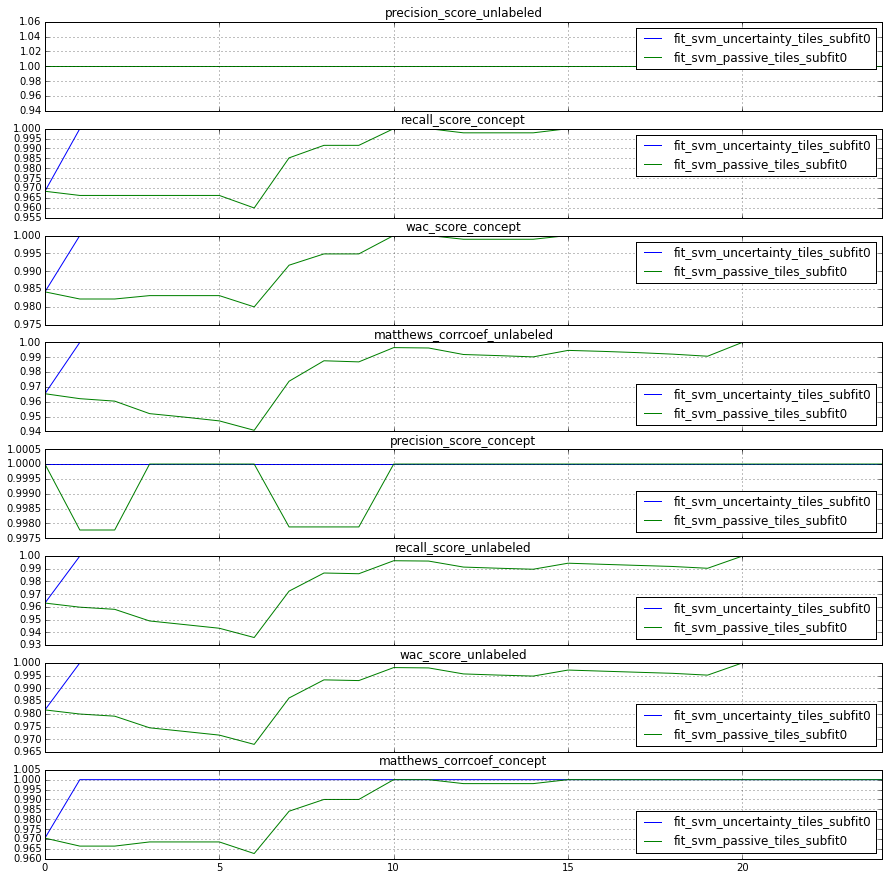

In [7]:
plot_monitors([unc_exp, passive_exp], folds='mean')

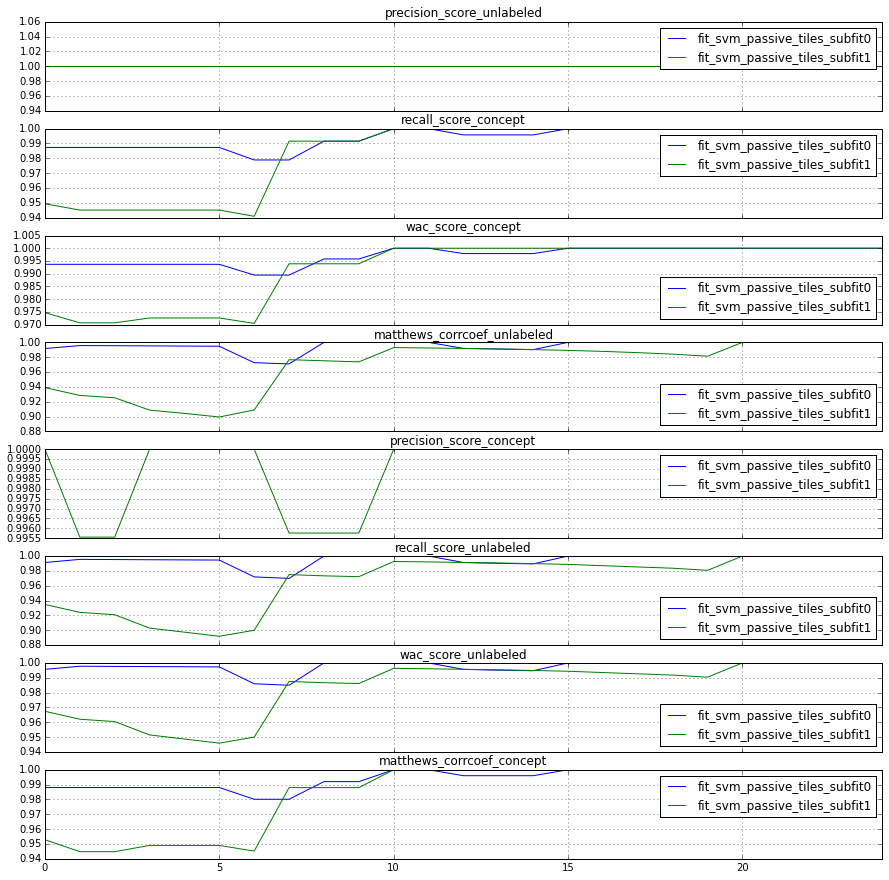

In [71]:
plot_monitors(passive_exp, folds='all')

In [10]:
grid_result_greedy = run_experiment("fit_grid",
                                    recalculate_experiments=False,
                                    n_jobs = 8,
                                    experiment_detailed_name="fit_svm_greedy_tiles",
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                   "base_model_kwargs:kernel": ['linear'],
                                                   "strategy_kwargs:c": list(np.linspace(0.1, 0.9, 9)),
                                                   "strategy_kwargs:dist": ["exp_euc"]},
                                    base_experiment_kwargs={"strategy": "quasi_greedy_batch",
                                                       "loader_function": "get_splitted_uniform_data",
                                                       "batch_size": 20,
                                                       "base_model": "SVC",
                                                       "loader_args": {"n_folds": 2}})

In [12]:
greedy_exp = get_best(grid_result_greedy.experiments, "mean_mcc_valid")
print len(passive_exp.monitors) # 2, bc there were 2 folds

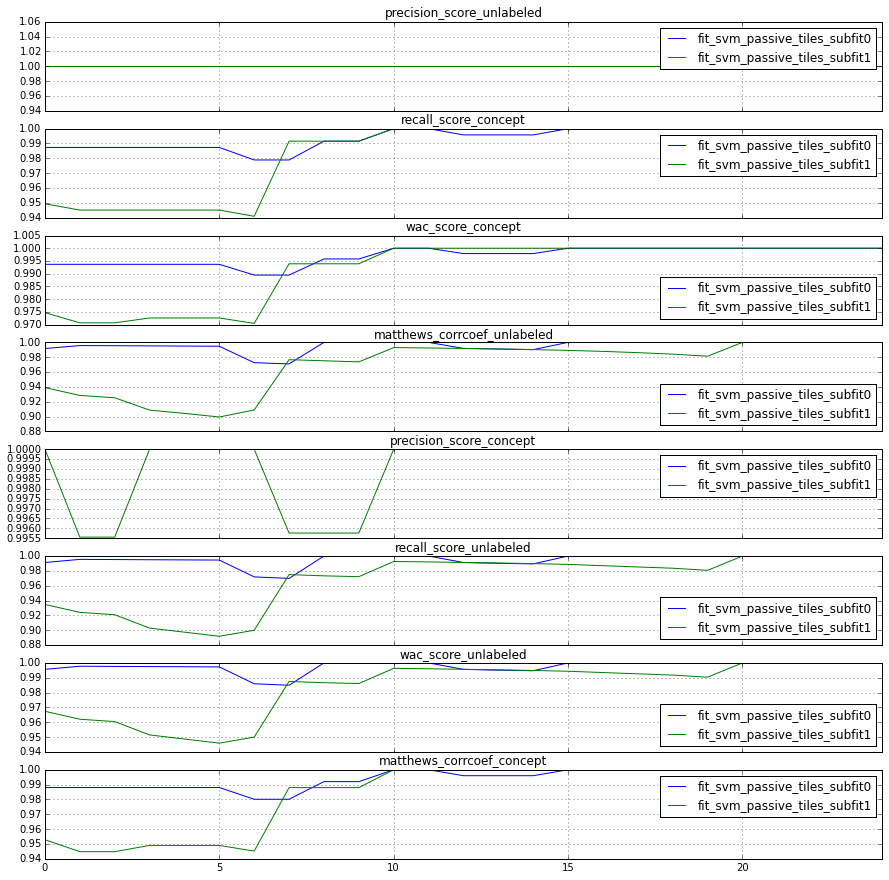

In [13]:
plot_monitors(passive_exp, folds='all')